In [94]:
import numpy as np

# **1**

In [80]:
#Ejercicio 1. a)
def codifica_aux(decimal,nBit):
    #Utilizamos como parametro un número natural en decimal y la cantidad de bits que queremos utilizar en el arreglo para decodificar
    binary = np.zeros(nBit,dtype=int)
    i = nBit - 1
    while decimal > 0:
        binary[i] = decimal % 2
        #Establecemos ahora al número natural como la división entera del numero anterior
        decimal //=2
        i-=1
    return binary

def decodifica_aux(binary):
    #Utilizamos como parametros un arreglo de bits e inicializamos un número decimal
    decimal = 0 
    for i in range(len(binary)):
        #Utilizando el algoritmo para convertir de binario a decimal
        decimal += binary[i]*2**(len(binary)-i-1)
    return decimal

In [81]:
#Ejercicio 1. c)
def codifica(x,nBit,a,b):
    # x es el número real que queremos codificar
    # nBit es la cantidad de Bits con la que queremos representar el número real
    # a es el límite inferior del intervalo donde se encuentra el número a evaluar
    # b es el límite superior, es importante que a sea menor que b
    # Calculamos la precisión dividiendo la longitud del intervalo entre el número de reales que podemos representar con nBits
    precision = (b-a)/(2**nBit)
    #Checamos que el número que queremos codificar se encuentra dentro del intervalo
    x= max(a,min(b,x))
    #Le asignamos una posición en el intervalo a x
    index = int((x-a)/precision)
    #Convertimos a binario
    binary = codifica_aux(index,nBit)
    return binary

#Ejercicio 1. d)
def decodifica(x_cod,nBit,a,b):
    #x_cod ahora es el arreglo de bits 
    precision = (b-a)/(2**nBit)
    #Hacemos un proceso inverso a la función de codificación
    index = decodifica_aux(x_cod)
    #Establecemos al número decimal como x y lo definimos conforme a la función anterior
    x = a+ index *precision
    return x

In [96]:
#Ejercicio 1. e)
def codifica_v(x,nBit,a,b):
    binary = list()
    #En este caso x es un vector de números reales que queremos codificar
    for i in x:
        binary.append(codifica(i,nBit,a,b))
    return binary

def decodifica_v(x_cod,nBit,a,b):
    decimal = list()
    #x_cod es un vector de arreglos de bits para convertir a decimal
    for i in x_cod:
        decimal.append(decodifica(i,nBit,a,b))
    return decimal        

# **2**

## **En caso de no tener instalado lo siguiente, instalarlo con los siguientes comandos:**

In [ ]:
# pip install numpy
# pip install matplotlib
# pip install pandas
# pip install networkx

## **Importamos las librerías que vamos a usar**

In [4]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import networkx as nx

In [5]:
# Definimos nuestro lector de archivos .col
# Y creamos una grafica en base a lo recolectado en el archivo
def leer_ArchivoCol(archivo):
    vertices = set()
    aristas = []

    with open(archivo, 'r') as f:
        for linea in f:
            # Ignorar comentarios
            if linea.startswith('c'):
                continue
            
            # Leer información de la instancia
            if linea.startswith('p'):
                _, _, n_vertices, n_aristas = linea.split()
                n_vertices = int(n_vertices)
                n_aristas = int(n_aristas)
            elif linea.startswith('e'):
                _, v1, v2 = linea.split()
                v1 = int(v1)
                v2 = int(v2)
                aristas.append((v1, v2))
                vertices.add(v1)
                vertices.add(v2)
    
    return n_vertices, n_aristas, list(vertices), aristas


Número de vértices: 4
Número de aristas: 5
Vértices: [1, 2, 3, 4]
Aristas: [(1, 2), (1, 3), (1, 4), (2, 4), (3, 4)]


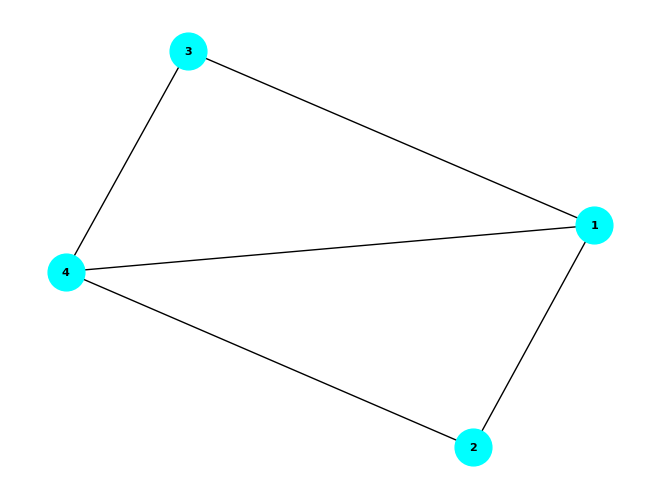

In [10]:
# Definimos una funcion que dibuje la grafica que obtuvimos anteriormente

def dibujar_Grafica(vertices, aristas):
    G = nx.Graph()
    G.add_nodes_from(vertices)
    G.add_edges_from(aristas)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='cyan', font_size=8, font_weight='bold')
    plt.show()


"""
Usamos como ejemplo a prueba1.col para probar las funciones anteriores

Recordemos que este archivo modela la grafica:
              1──────3
              │╲     │
              │ ╲    │
              │  ╲   │
              │   ╲  │
              │    ╲ │
              2──────4
"""

archivo = 'prueba1.col'
n_vertices, n_aristas, vertices, aristas = leer_ArchivoCol(archivo)

print("Número de vértices:", n_vertices)
print("Número de aristas:", n_aristas)
print("Vértices:", vertices)
print("Aristas:", aristas)

dibujar_Grafica(vertices, aristas)




## **Esquema de representación de soluciones.**

In [11]:
class SColoracion:
    def __init__(self, n_vertices, colores_asignados=None):
        self.n_vertices = n_vertices
        if colores_asignados is None:
            self.colores_asignados = [-1] * n_vertices  # Inicialmente ningún vértice tiene color asignado
        else:
            self.colores_asignados = colores_asignados
    
    def asignar_color(self, vertice, color):
        self.colores_asignados[vertice - 1] = color  # Los índices de los vértices empiezan en 1
    
    def obtener_color(self, vertice):
        return self.colores_asignados[vertice - 1]
    

### **Declaramos la siguiente funcion auxiliar para mapear colores a un numero entero de entrada**

In [12]:
'''
Colores disponibles en NetworkX:
Azul: 'b', 'blue', 'navy', 'skyblue', 'cyan'
Rojo: 'r', 'red', 'darkred', 'tomato', 'crimson'
Verde: 'g', 'green', 'forestgreen', 'limegreen', 'seagreen'
Amarillo: 'y', 'yellow', 'gold', 'khaki', 'lightyellow'
Morado: 'm', 'magenta', 'purple', 'deeppink', 'fuchsia'
Naranja: 'o', 'orange', 'darkorange', 'burntorange', 'coral'
Negro: 'k', 'black', 'gray', 'darkgray', 'silver'
Blanco: 'w', 'white', 'ivory', 'snow', 'ghostwhite'
'''
def mapear_color(numero):
    colores = ['b', 'blue', 'navy', 'skyblue', 'cyan',
               'r', 'red', 'darkred', 'tomato', 'crimson',
               'g', 'green', 'forestgreen', 'limegreen', 'seagreen',
               'y', 'yellow', 'gold', 'khaki', 'lightyellow',
               'm', 'magenta', 'purple', 'deeppink', 'fuchsia',
               'o', 'orange', 'darkorange', 'burntorange', 'coral',
               'k', 'black', 'gray', 'darkgray', 'silver',
               'w', 'white', 'ivory', 'snow', 'ghostwhite'] 
    return colores[numero % len(colores)]


### **La funcion de evaluacion que usaremos**

In [13]:
def zakharov(x):
    x = pd.Series(x)
    d = len(x)
    t1 = sum(x**2)
    t2 = 0.5*sum(range(d)*(x**2))
    y = t1 + (t2**2) + (t2**4)
    return y

In [14]:
# funcion auxiliar que devuelve una lista con los colores (en numero) de los vecinos de un vertice
# entrada: Solucion, vertice
# salida: lista con los colores de los vecinos
def coloresVecinos(solucion, vertice):
    vecinos = [v for v1, v2 in aristas if v1 == vertice for v in [v2]] + [v for v1, v2 in aristas if v2 == vertice for v in [v1]]
    colores = [solucion.obtener_color(v) for v in vecinos]
    return colores

### **Generacion de soluciones aleatorias**

Si bien seguimos una heuristica para brindar la solucion, estas serán aleatorias en el ambito de tener colores aleatorios en cada nodo
siempre y cuando no se repitan colores en los nodos adyacentes.

In [15]:
# Vamos a recibir un archivo el cual al leer con la funcion leer_ArchivoCol
# generaremos una grafica y apartir de los elementos de esa grafica vamos a
# escoger un vertice aleatorio y asignarle un color aleatorio, despues vamos a 
# revisar quienes son los demas vertices y asignarles un color diferente (aleatorio) diferente en caso de que tengan vecinos con el mismo color
def colorearGraficaConNColores(archivo):
    n_vertices, n_aristas, vertices, aristas = leer_ArchivoCol(archivo)
    # dibujar_Grafica(vertices, aristas)
    n_colores = n_vertices # Como en el peor de los casos se necesitaran n_vertices colores, vamos a asignarle ese numero de colores
    solucion = SColoracion(n_vertices)
    vertices = list(range(1, n_vertices+1))

    #Ahora ordenamos la lista de vertices con los vertices de mayor a menor, iniciando por aquellos que tienen mas vecinos
    vertices.sort(key=lambda v: len([v1 for v1, v2 in aristas if v1 == v or v2 == v]), reverse=True)

    #vecinos = [v for v1, v2 in aristas if v1 == vertice for v in [v2]] + [v for v1, v2 in aristas if v2 == vertice for v in [v1]]

    for vertice in vertices:
        # Asignar un color aleatorio al vértice y verificar que ese color no esté asignado a ninguno de sus vecinos
        color = (random.randint(1, n_colores))
        while color in coloresVecinos(solucion, vertice):
            color = (random.randint(1, n_colores))
        solucion.asignar_color(vertice, color)
        
        #for vecino in vecinos:
        #    color = (random.randint(1, n_colores))
        #    solucion.asignar_color(vecino, color)
    return solucion


In [16]:
# Funcion copia de dibujarGrafica (hacen practicamente lo mismo)
def dibujar_Grafica_coloreado(solucion, vertices, aristas):
    G = nx.Graph()
    G.add_nodes_from(vertices)
    G.add_edges_from(aristas)
    pos = nx.spring_layout(G)
    colores = [mapear_color(solucion.obtener_color(v)) for v in vertices]
    nx.draw(G, pos, with_labels=True, node_size=700, node_color=colores, font_size=8, font_weight='bold')
    plt.show()


### **Probamos la solucion generada con lo siguiente**

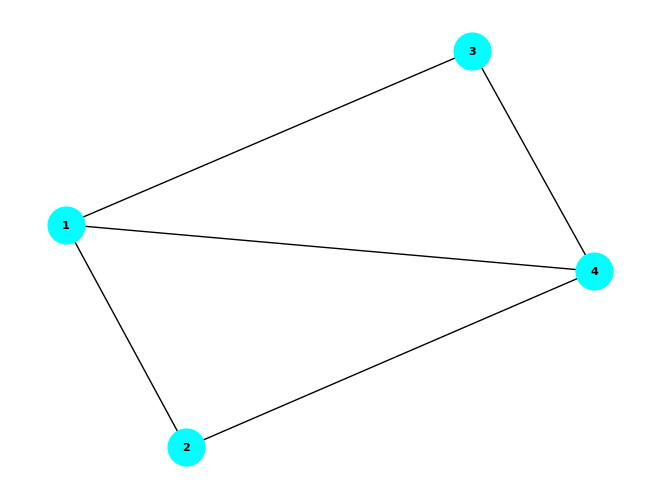

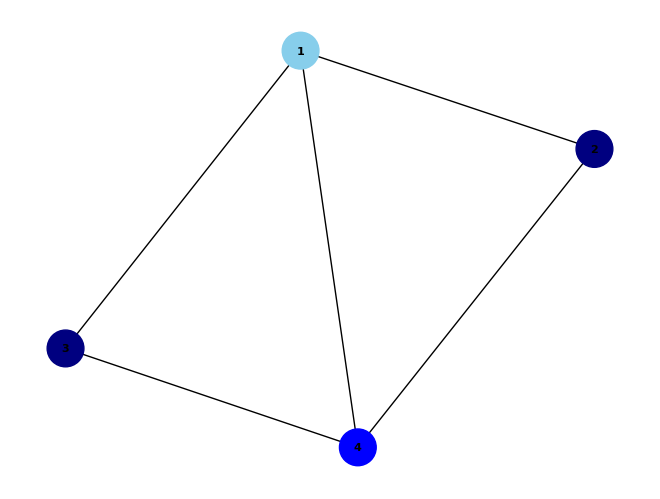

In [20]:
archivo = 'prueba1.col'
n_vertices, n_aristas, vertices, aristas = leer_ArchivoCol(archivo)

#print("Número de vértices:", n_vertices)
#print("Número de aristas:", n_aristas)
#print("Vértices:", vertices)
#print("Aristas:", aristas)

dibujar_Grafica(vertices, aristas)
solucion = colorearGraficaConNColores(archivo)
dibujar_Grafica_coloreado(solucion, vertices, aristas)

# Notese como primero dibujamos la grafica original y despues dibujamos el resultado de la solucion aleatoria


### **Vecindad de Soluciones**

In [21]:
# Funcion con la que generamos una solucion vecina a la generafa anteriormente
def generar_vecino(solucion_actual):
    """
    Genera una solución vecina modificando aleatoriamente un color de un vértice.

    Parámetros:
    solucion_actual : SColoracion
        Solución actual que se usará como base para generar la solución vecina.
    Devuelve:
    SColoracion
        Una instancia de la clase SColoracion que representa una solución vecina.
     
    """
    vertice_a_cambiar = random.randint(1, solucion_actual.n_vertices)
    #colores_vecinos = coloresVecinos(solucion_actual, vertice_a_cambiar)


    color_asignado_actual = solucion_actual.obtener_color(vertice_a_cambiar)
    nuevo_color = color_asignado_actual
    while nuevo_color in coloresVecinos(solucion, vertice_a_cambiar):
        nuevo_color = random.randint(1, solucion_actual.n_vertices)
        solucion_actual.asignar_color(vertice_a_cambiar, nuevo_color)
    
    # Crear una copia de la solución actual y modificar el color del vértice seleccionado
    nueva_solucion = SColoracion(solucion_actual.n_vertices, solucion_actual.colores_asignados[:])
    nueva_solucion.asignar_color(vertice_a_cambiar, nuevo_color)
    return nueva_solucion

In [22]:
# Funcion que genera una vecindad de soluciones
def generarVecindad(solucion):
    vecindad = []
    for i in range(100):
        vecino = generar_vecino(solucion)
        vecindad.append(vecino)
    return vecindad


## **Busqueda por escalada**

Ya que contamos con una vecindad de soluciones para el problema de coloramiento, procedemos a implementar la busqueda por escalada
para buscar la solucion que mas se acerque a que tengamos el menor numero de colores posibles en la grafica.

In [24]:
# implementacion de la busqueda por escalada
def busquedaEscalada(archivo):
    solucion = colorearGraficaConNColores(archivo)
    costo = zakharov(solucion.colores_asignados)
    while True:
        vecindad = generarVecindad(solucion)
        mejor_vecino = min(vecindad, key=lambda x: zakharov(x.colores_asignados))
        if zakharov(mejor_vecino.colores_asignados) < costo:
            solucion = mejor_vecino
            costo = zakharov(solucion.colores_asignados)
        else:
            break
    return solucion

# Funcion copia de dibujarGrafica (hacen practicamente lo mismo X2 XD)
def dibujarsolucionEscalada(solucion, vertices, aristas):
    G = nx.Graph()
    G.add_nodes_from(vertices)
    G.add_edges_from(aristas)
    pos = nx.spring_layout(G)
    colores = [mapear_color(solucion.obtener_color(v)) for v in vertices]
    nx.draw(G, pos, with_labels=True, node_size=700, node_color=colores, font_size=8, font_weight='bold')
    plt.show()


### Procedemos a probar nuestra busqueda por escalada

Número de vértices: 4
Número de aristas: 5
Vértices: [1, 2, 3, 4]
Aristas: [(1, 2), (1, 3), (1, 4), (2, 4), (3, 4)]


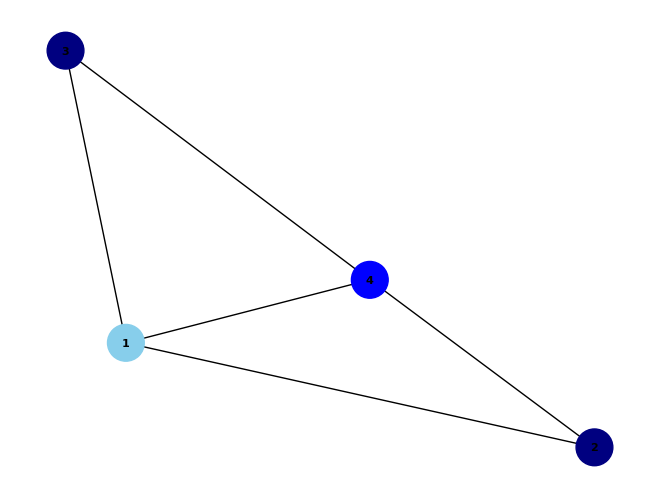

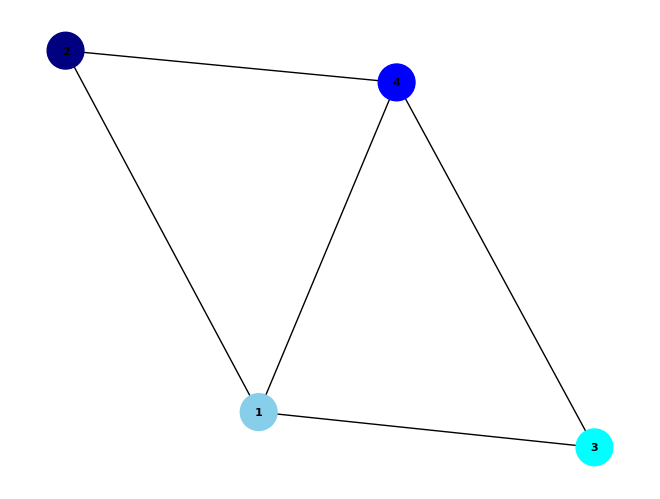

In [27]:
archivo = 'prueba1.col'
n_vertices, n_aristas, vertices, aristas = leer_ArchivoCol(archivo)

print("Número de vértices:", n_vertices)
print("Número de aristas:", n_aristas)
print("Vértices:", vertices)
print("Aristas:", aristas)

#dibujar_Grafica(vertices, aristas)
#solucion = busquedaEscalada(archivo)
dibujar_Grafica_coloreado(solucion, vertices, aristas)
solucionEscalada = busquedaEscalada(archivo)
dibujarsolucionEscalada(solucionEscalada, vertices, aristas)

### Prueba en grafica de  5 vértices y 6 aristas